<a href="https://colab.research.google.com/github/nchieu2025/jupyter-exploration/blob/main/MT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

def augment(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    return image, label


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Oxford-IIIT Pet Dataset
dataset_name = "oxford_iiit_pet"
dataset, info = tfds.load(dataset_name, with_info=True, as_supervised=True)

# Extract training and testing datasets
train_data, test_data = dataset["train"], dataset["test"]

import matplotlib.pyplot as plt

# Visualize Sample Images (Before Preprocessing)
def show_sample_images(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, (image_batch, label_batch) in enumerate(dataset.take(num_images)):
        # Iterate through image in the batch
        for j, image in enumerate(image_batch):
            if (i * image_batch.shape[0] + j) > num_images:
                plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.show()
    #Use iter and next to get elements from the dataset
    # Corrected the typo here: interator -> iterator
    iterator = iter(dataset)
    for i in range(num_images):
        image, label = next(iterator) # Get the next image and label
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.show()

#Call show_sample_images(train_data)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.G7XWQE_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.G7XWQE_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

#Load the Oxford-IIIT Pet Dataset
dataset_name = "oxford_iiit_pet"
dataset, info = tfds.load(dataset_name, with_info=True, as_supervised=True)

#Extract training and testing datasets
train_data, test_data = dataset["train"], dataset["test"]

In [ ]:
import tensorflow_hub as hub

detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")


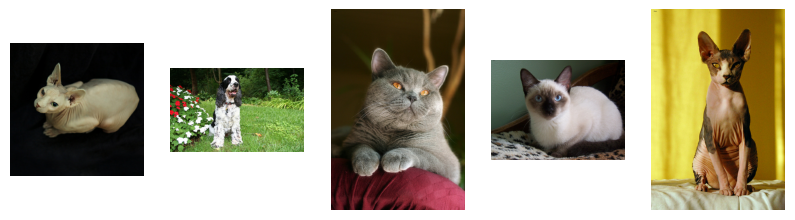

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.4929 - loss: 2.0319 - val_accuracy: 0.8441 - val_loss: 0.5579
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9064 - loss: 0.3584 - val_accuracy: 0.8632 - val_loss: 0.4560
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.9478 - loss: 0.2264 - val_accuracy: 0.8686 - val_loss: 0.4244
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 358s 3s/step - accuracy: 0.9728 - loss: 0.1596 - val_accuracy: 0.8733 - val_loss: 0.4109
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.9822 - loss: 0.1186 - val_accuracy: 0.8757 - val_loss: 0.4054
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.9889 - loss: 0.0912 - val_accuracy: 0.8733 - val_loss: 0.4029
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.9928 - loss: 0.0723 - val_accuracy: 0.8730 - val_loss: 0.4012
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/

Test Loss: 0.3996928632259369, Test Accuracy: 0.8773507475852966


In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Oxford-IIIT Pet Dataset
dataset_name = "oxford_iiit_pet"
dataset, info = tfds.load(dataset_name, with_info=True, as_supervised=True)

# Extract training and testing datasets
train_data, test_data = dataset["train"], dataset["test"]

# Function to display images
def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.show()

# Display some training images
show_images(train_data)

# Data Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0  # Normalize
    return image, label

train_data = train_data.map(preprocess).batch(32)
test_data = test_data.map(preprocess).batch(32)

# Load a pre-trained SSD MobileNet V2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
base_model.trainable = False

# Build an object detection model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(37, activation='softmax')  # 37 pet classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, epochs=10, validation_data=test_data)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Save the model
model.save("oxford_pet_detector.h5")


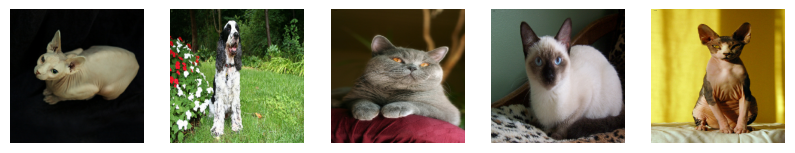

In [ ]:
# Visualize Sample Images (Before Preprocessing)
def show_sample_images(dataset, num_images=5):
    plt.figure(figsize=(10, 5))
    count = 0  # To track the number of images displayed

    for image, label in dataset:  # Dataset should not be batched
        plt.subplot(1, num_images, count + 1)
        plt.imshow(image.numpy())  # Convert tensor to numpy array for display
        plt.axis('off')
        count += 1
        if count >= num_images:
            break  # Stop after displaying the required number of images

    plt.show()

# Call the function
show_sample_images(train_data.unbatch())  # Unbatch to get individual images
